# games

In [ ]:
annotated_url = "https://gameknot.com/list_annotated.pl?u=all"
number_of_pages = 316

In [ ]:
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
BASE_PATH = '/content/drive/MyDrive/NLP/Data/'

In [ ]:
game_urls = pickle.load(open(BASE_PATH+"saved_game_urls.p","rb"))

In [ ]:
len(game_urls)

12636

In [ ]:
len(list(set(game_urls)))

12636

# load

In [ ]:
games_data_path = BASE_PATH + 'NEW_fix/games_data'
NUMER_OF_DATA_DIRS = 12

In [ ]:
paths = [f'{games_data_path}{i+1}.p' for i in range(NUMER_OF_DATA_DIRS)]

In [ ]:
data = []
for path in paths:
    with open(path, 'rb') as file:
        raw_data = pickle.load(file)
    data.extend(raw_data)

# samples


In [ ]:
len(data)

349015

In [ ]:
len(list(set(data)))

348868

In [ ]:
data = list(set(data))

In [ ]:
total = len(list(set(data)))

In [ ]:
moves_count, legal_moves_count, attackers_count, attacks_count, len_comment = [], [], [], [], []

for data_object in data:
  (FEN, moves, last_move_desc, legal_moves, attackers_list, attacks_list, comment) = data_object

  moves_ = moves.count(',') + 1 if moves != '' else 0
  moves_count.append(moves_)

  legal_moves_ = legal_moves.count(',') + 1 if legal_moves != '' else 0
  legal_moves_count.append(legal_moves_) 

  attackers = attackers_list.count(',') + 1 if attackers_list != '' else 0
  attackers_count.append(attackers) 

  attacks = attacks_list.count(',') + 1 if attacks_list != '' else 0
  attacks_count.append(attacks) 
  
  len_comment.append(len(comment.split(' ')))

# moves

In [ ]:
import collections
import matplotlib.pyplot as plt

In [ ]:
ctr_moves = collections.Counter(moves_count)

In [ ]:
ctr_moves

Counter({0: 4661,
         1: 200374,
         2: 59950,
         3: 27586,
         4: 19427,
         5: 10112,
         6: 7594,
         7: 4352,
         8: 3516,
         9: 2203,
         10: 1865,
         11: 1199,
         12: 1032,
         13: 749,
         14: 665,
         15: 499,
         16: 463,
         17: 319,
         18: 290,
         19: 244,
         20: 212,
         21: 172,
         22: 157,
         23: 117,
         24: 93,
         25: 98,
         26: 80,
         27: 73,
         28: 72,
         29: 55,
         30: 55,
         31: 45,
         32: 43,
         33: 45,
         34: 29,
         35: 19,
         36: 29,
         37: 21,
         38: 21,
         39: 20,
         40: 22,
         41: 19,
         42: 7,
         43: 17,
         44: 16,
         45: 10,
         46: 15,
         47: 14,
         48: 5,
         49: 11,
         50: 8,
         51: 9,
         52: 5,
         53: 7,
         54: 12,
         55: 12,
         56: 13,
    

(array([  4661.,      0., 200374.,      0.,  59950.,      0.,  27586.,
             0.,  19427.,  10112.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

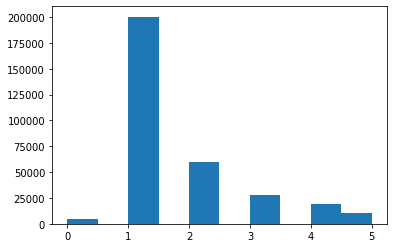

In [ ]:
plt.hist([l for l in moves_count if l<6])

# legal moves


In [ ]:
ctr_legal_moves = collections.Counter(legal_moves_count)

In [ ]:
ctr_legal_moves 

Counter({0: 4071,
         1: 3988,
         2: 5495,
         3: 5458,
         4: 4756,
         5: 3567,
         6: 2527,
         7: 1681,
         8: 1234,
         9: 962,
         10: 934,
         11: 1067,
         12: 1216,
         13: 1485,
         14: 1606,
         15: 1876,
         16: 2253,
         17: 2451,
         18: 2632,
         19: 2989,
         20: 9119,
         21: 4193,
         22: 5230,
         23: 4914,
         24: 5120,
         25: 6448,
         26: 7509,
         27: 10167,
         28: 11208,
         29: 13089,
         30: 15548,
         31: 13708,
         32: 14466,
         33: 15042,
         34: 14564,
         35: 14347,
         36: 14110,
         37: 13833,
         38: 13569,
         39: 12607,
         40: 11233,
         41: 10249,
         42: 9484,
         43: 8472,
         44: 7236,
         45: 6167,
         46: 5228,
         47: 4436,
         48: 3436,
         49: 2863,
         50: 2262,
         51: 1783,
         

(array([3.27770e+04, 1.13990e+04, 4.30960e+04, 1.00737e+05, 1.13996e+05,
        4.01000e+04, 6.47100e+03, 2.77000e+02, 1.20000e+01, 3.00000e+00]),
 array([ 0. ,  8.5, 17. , 25.5, 34. , 42.5, 51. , 59.5, 68. , 76.5, 85. ]),
 <a list of 10 Patch objects>)

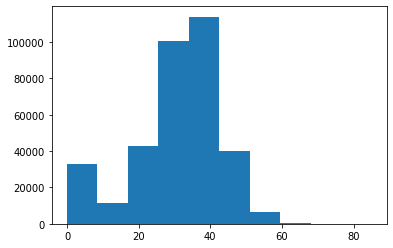

In [ ]:
plt.hist(legal_moves_count)

# attakers

In [ ]:
ctr_attackers = collections.Counter(attackers_count) # attacks_count

In [ ]:
ctr_attackers

Counter({0: 119395, 1: 127336, 2: 78612, 3: 20676, 4: 2804, 5: 42, 6: 3})

(array([1.19395e+05, 1.27336e+05, 0.00000e+00, 7.86120e+04, 0.00000e+00,
        2.06760e+04, 2.80400e+03, 0.00000e+00, 4.20000e+01, 3.00000e+00]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

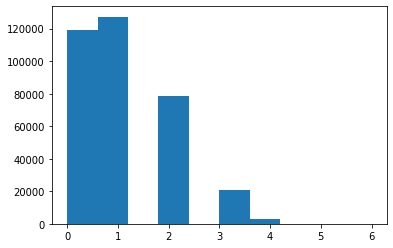

In [ ]:
plt.hist(attackers_count)

# attacks


In [ ]:
ctr_attacks = collections.Counter(attacks_count) 

In [ ]:
ctr_attacks

Counter({0: 60211,
         1: 89323,
         2: 84373,
         3: 56875,
         4: 31232,
         5: 15830,
         6: 8657,
         7: 2163,
         8: 204})

(array([60211., 89323., 84373., 56875.,     0., 31232., 15830.,  8657.,
         2163.,   204.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

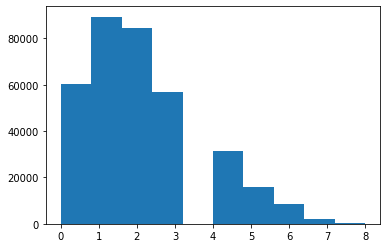

In [ ]:
plt.hist(attacks_count)

# comment

In [ ]:
sum(len_comment)/total

20.706226997030395

In [ ]:
ctr_comment = collections.Counter(len_comment)

In [ ]:
ctr_comment

(array([200505.,  79946.,  32837.,  15168.,   7476.,   4475.,   2732.,
          1717.,   1098.,    777.]),
 array([  1. ,  15.8,  30.6,  45.4,  60.2,  75. ,  89.8, 104.6, 119.4,
        134.2, 149. ]),
 <a list of 10 Patch objects>)

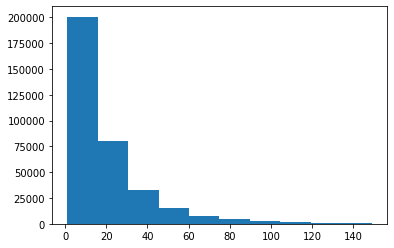

In [ ]:
plt.hist([l for l in len_comment if l<150])

# words

In [ ]:
word_frequencies = collections.defaultdict(int)

In [ ]:
for data_object in data:
  (FEN, moves, last_move_desc, legal_moves, attackers_list, attacks_list, comment) = data_object
  words = comment.split(' ')
  for word in words:
    word_frequencies[word]+=1

In [ ]:
len(word_frequencies.keys())

236981

In [ ]:
freqThreshold = 3 
rareWords = []

In [ ]:
for word,freq in word_frequencies.items():
    if freq>freqThreshold:
      pass
    else:
      rareWords.append(word)

In [ ]:
len(rareWords)

196452

In [ ]:
rareWords

['sustainable',
 'awaiting!',
 'awe!',
 'fiercely!',
 'segnata,',
 'dopo:',
 'vincente.\nuna',
 'spiegare.',
 "l'indiano",
 'madornale,',
 'successe',
 'hubner',
 'eliminatorie',
 'abano',
 'terme',
 '1979.\n',
 'tardaría',
 'hallar',
 'fue,',
 'hora.',
 '10....bg4',
 'stage...wrong',
 'allow...',
 'meeting.',
 'rook.....watch',
 'so...i',
 'enrocan',
 'prefieren',
 'cerrado',
 'resguardado.',
 'impressing:',
 'rook.\n\nwhite',
 'point.\n\nin',
 '*willing*',
 'andydufresne',
 'intial',
 'win.\n\ncomments',
 'aggressive!),',
 'flexibilty.',
 'bx3e.',
 '(qh7,',
 'worrying),',
 'bxb4+,',
 'rf2!,',
 'rf2...',
 'admit:',
 'each...',
 'nxd5)...',
 'freddo,',
 '"29...h6',
 '(want',
 '...re7',
 'trapped."',
 '...\r\nat',
 'near."',
 'affectively',
 'halosar',
 'ever-check,',
 'fortuanately',
 '6.d4.',
 'dudando',
 'esa.',
 'insegura',
 '12...kxe5,',
 '12...kc5',
 '10-12',
 '...hg5',
 'sacrifice--16...nc6',
 'can.\n24.',
 'deimler',
 '...qxe5',
 'rxh6!',
 'helpt',
 'meer.]',
 'surprising...',
 

chess words


In [ ]:
board_notation = []
col_names = 'abcdefgh'
row_names = '87654321'
for col in col_names:
  for row in row_names:
    board_notation.append(col+row)

In [ ]:
chess_words = ['king', 'queen', 'rook', 'bishop', 'knight', 'pawn', 
               'check', 'checkmate', 'stalemate', 'resign', 
               'castle', 'castling', 'passant', 'promotion',
               'rank', 'file',
               'opening', 'ending', 'endgame',
               'attack', 'threat', 'defence',
               'win', 'lose',
               'illegal', 'legal',
               'kingside', 'queenside', 'pin',
               'open', 'closed', 'gambit', 'isolated']

In [ ]:
other_words = ['move', 'moves', 'moving', 
               'position', 'game', 'opponent', 'lost', 'diagonal',
               "white's", "black's", 'piece', 'pieces', 
               'attacking', 'threatening', 'defend', 'threaten', 'defending', 'defense', 'protecting',
               'forced', 'force', 'free', 'forcing', 'safe', 
               'protect', 'prevent', 'sacrifice',
               'advantage', 'advance', 'developing', 'develop', 'development', 'developed',
               'board', 'square', 'squares', 'tempo', 'mistake', 'capture', 'fork', 'centre',  'center']

In [ ]:
words = board_notation + chess_words + other_words

In [ ]:
chess_frequencies = {key: word_frequencies[key] for key in words}

In [ ]:
chess_frequencies

{'a1': 481,
 'a2': 502,
 'a3': 1102,
 'a4': 1269,
 'a5': 1210,
 'a6': 1170,
 'a7': 432,
 'a8': 390,
 'advance': 2784,
 'advantage': 5928,
 'attack': 15303,
 'attacking': 6931,
 'b1': 300,
 'b2': 1027,
 'b3': 1153,
 'b4': 1815,
 'b5': 2103,
 'b6': 1063,
 'b7': 966,
 'b8': 269,
 'bishop': 28285,
 "black's": 13905,
 'board': 2358,
 'c1': 423,
 'c2': 886,
 'c3': 2209,
 'c4': 2678,
 'c5': 2587,
 'c6': 1959,
 'c7': 887,
 'c8': 484,
 'capture': 3082,
 'castle': 4418,
 'castling': 2498,
 'center': 4957,
 'centre': 2187,
 'check': 5798,
 'checkmate': 1661,
 'closed': 857,
 'd1': 391,
 'd2': 681,
 'd3': 1481,
 'd4': 4570,
 'd5': 4384,
 'd6': 2208,
 'd7': 862,
 'd8': 412,
 'defence': 1732,
 'defend': 4219,
 'defending': 2516,
 'defense': 2467,
 'develop': 3852,
 'developed': 1554,
 'developing': 3190,
 'development': 3822,
 'diagonal': 3110,
 'e1': 391,
 'e2': 686,
 'e3': 1406,
 'e4': 4353,
 'e5': 4963,
 'e6': 2129,
 'e7': 906,
 'e8': 393,
 'endgame': 1487,
 'ending': 644,
 'f1': 462,
 'f2': 1076

In [ ]:
sorted_keys = sorted(chess_frequencies, key=chess_frequencies.get, reverse=True)

In [ ]:
sorted_keys

['pawn',
 'move',
 'knight',
 'bishop',
 'queen',
 'king',
 'rook',
 'game',
 'attack',
 "black's",
 "white's",
 'moves',
 'position',
 'pieces',
 'open',
 'win',
 'attacking',
 'opening',
 'piece',
 'opponent',
 'square',
 'advantage',
 'threatening',
 'check',
 'threat',
 'e5',
 'center',
 'd4',
 'castle',
 'd5',
 'e4',
 'lose',
 'defend',
 'kingside',
 'forced',
 'develop',
 'development',
 'lost',
 'file',
 'moving',
 'queenside',
 'free',
 'pin',
 'prevent',
 'protect',
 'developing',
 'diagonal',
 'capture',
 'tempo',
 'force',
 'mistake',
 'advance',
 'c4',
 'c5',
 'defending',
 'castling',
 'fork',
 'defense',
 'squares',
 'board',
 'f4',
 'forcing',
 'f6',
 'f5',
 'protecting',
 'c3',
 'd6',
 'centre',
 'safe',
 'e6',
 'b5',
 'sacrifice',
 'f3',
 'c6',
 'g4',
 'rank',
 'b4',
 'g5',
 'g6',
 'defence',
 'gambit',
 'f7',
 'checkmate',
 'threaten',
 'developed',
 'endgame',
 'd3',
 'h6',
 'h3',
 'e3',
 'g3',
 'h5',
 'a4',
 'h4',
 'a5',
 'a6',
 'b3',
 'isolated',
 'a3',
 'g7',
 'f2